In [1]:
"""
Run these before:

"""
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from glob import glob

SAVE_LOCATION = "images"
BECHMARKS_LOCATION  = "./bechmarks"

DBS = [
    "mongo",
    "postgres",
    "cassandra"
]

# Run the scripts
sizes = [10, 100, 1000, 10000, 10000, 100000]

data = {
    "mongo": [],
    "postgres": [],
    "cassandra": []

}
for size in sizes:
    for db in data.keys():
        file_stub = f"./benchmarks/{db}-size-{size}-batch_size-*-itertion-*.json"
        files = glob(file_stub)
        data[db].append(files)


    # plot for that size
    filename = f"plot-{size}.png"

In [7]:
def frange(x, y, jump):
    while x < y:
        yield x
        x += jump
def visualize_db(
    size=100,
    batch_size=10
):
    dbs = [
        "mongo",
        "postgres",
        "cassandra"
    ]
    values_to_plot = {
        'connect': "red",
        'create_tables': "blue",
        'add_jobs_batch': "yellow",
        'add_blobs_batch': "black",
        'query_jobs_all': "pink",
        'query_blobs_all': "orange"
    }
    colors = {
        "mongo": "green",
        "postgres": "blue",
        "cassandra": "red"
    }
    for db in dbs:
        file_stub = f"benchmarks/{db}-size-{size}-batch_size-{batch_size}-*.json"
        files = glob(file_stub)
        if files:
            values = json.load(open(files[0], "r"))
        #     for i, (key, value) in enumerate(sorted(values.items())):
            for i, key in enumerate(values_to_plot):
                if key in values.keys():
                    print(key, values[key])
    #                 plt.scatter(i+1, values[key], label=f"{key}-{db}", color=values_to_plot[key])
                    plt.scatter(i+1, values[key], label=f"{key}-{db}-{i+1}", color=colors[db])
                elif key == "create_tables" :
                    print(key, 0)
        #             plt.scatter(i+1, 0, label=f"{key}-{db}", color=values_to_plot[key])
                    plt.scatter(i+1, 0, label=f"{key}-{db}-{i+1}", color=colors[db])
            print()

    
    plt.legend(loc="upper left")
    import matplotlib
    plt.title(f"DB Comparison for: TABLE_SIZE: {size} BATCH_SIZe: {batch_size}")
    plt.xlabel("test")
    plt.ylabel("time in seconds")
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(18.5, 10.5)
    fig.savefig(f"images/plot-{size}-{batch_size}.png", dpi=100)

connect 0.0010714530944824219
create_tables 0
add_jobs_batch 0.6993203163146973
add_blobs_batch 1.1047697067260742
query_jobs_all 0.05025911331176758
query_blobs_all 0.7071249485015869

connect 0.03676557540893555
create_tables 0.17981863021850586
add_jobs_batch 1.2316176891326904
add_blobs_batch 13.494308710098267
query_jobs_all 0.029756784439086914
query_blobs_all 2.8104307651519775



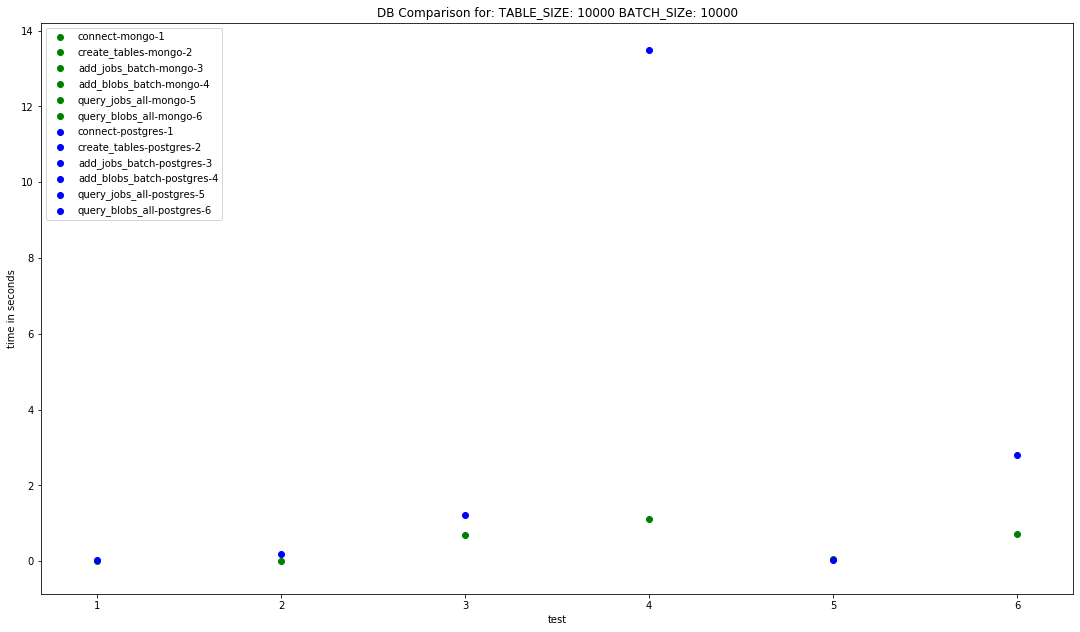

In [11]:
# sizes = [
#     10, 100, 1000, 10000
# ]
# bsize = [
#     1, 5, 10, 100, 1000, 10000
# ]

# for s in sizes:
#     for b in bsize:
#         visualize_db(s, b)        
#         plt.clf()
        
visualize_db(10000, 10000)

connect 0.0010402202606201172
create_tables
add_jobs_batch 0.5340132713317871
add_blobs_batch 0.04811835289001465
query_jobs_all 0.0017790794372558594
query_blobs_all 0.009974002838134766

connect 0.03696608543395996
create_tables 0.029595136642456055
add_jobs_batch 0.04980278015136719
add_blobs_batch 0.22807788848876953
query_jobs_all 0.0010700225830078125
query_blobs_all 0.022799015045166016



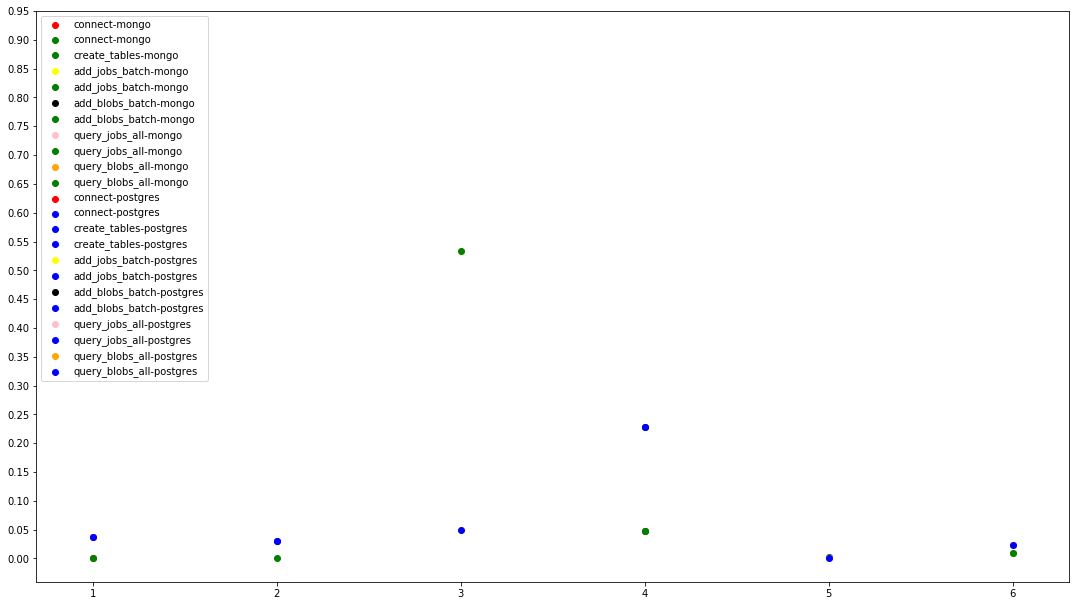

In [106]:
size=100
batch_size=10
dbs = [
    "mongo",
    "postgres",
    "cassandra"
]
values_to_plot = {
    'connect': "red",
    'create_tables': "blue",
    'add_jobs_batch': "yellow",
    'add_blobs_batch': "black",
    'query_jobs_all': "pink",
    'query_blobs_all': "orange"
}
colors = {
    "mongo": "green",
    "postgres": "blue",
    "cassandra": "red"
}
for db in dbs:
    file_stub = f"benchmarks/{db}-size-{size}-batch_size-{batch_size}-*.json"
    files = glob(file_stub)
    if files:
        values = json.load(open(files[0], "r"))
#     for i, (key, value) in enumerate(sorted(values.items())):
        for i, key in enumerate(values_to_plot):
            if key in values.keys():
                print(key, values[key])
                plt.scatter(i+1, values[key], label=f"{key}-{db}", color=values_to_plot[key])
                plt.scatter(i+1, values[key], label=f"{key}-{db}", color=colors[db])
            elif key == "create_tables" :
                print(key)
    #             plt.scatter(i+1, 0, label=f"{key}-{db}", color=values_to_plot[key])
                plt.scatter(i+1, 0, label=f"{key}-{db}", color=colors[db])
        print()
    
plt.legend(loc="upper left")
plt.yticks([*frange(0, 1, 0.05)])
import matplotlib
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('query_time_blob_data.png', dpi=100)

<Figure size 1332x756 with 0 Axes>

In [25]:
values

{'connect_post': 0.03688406944274902,
 'create_tables': 0.05016517639160156,
 'load_pickle_data': 0.050887346267700195,
 'add_jobs_batch': 0.03355813026428223,
 'add_blobs_batch': 0.2351675033569336,
 'query_jobs_all': 0.0012898445129394531,
 'query_blobs_all': 0.0275113582611084}